# Reducing Hospital Readmission
![readmission-rates](second_project/img/readmission-rates.jpg)

## Table of contents

1. Itroduction
2. Executive summary
3. Data and Methods
4. Expolratory Data Analysis (EDA) 
5. Further consideration
6. Conclusions and Recommendations
7. Annex

## Introduction

Hospital readmission is a problem in healthcare where patients are discharged from the hospital and then readmitted within a certain period of time, often within 30 days of their initial discharge. This is a costly and preventable problem that can negatively impact patients' health outcomes and quality of life. Causes of readmissions include inadequate care during initial hospitalization and poor discharge planning. Patients with chronic conditions, such as heart failure, diabetes, and respiratory disease, are at a particularly high risk of readmission. 

Hospital readmissions are also an important quality of care measure in healthcare. The Centers for Medicare and Medicaid Services (CMS) implemented a Hospital Readmissions Reduction Program (HRRP) in 2012, which financially penalizes hospitals with higher-than-expected readmission rates for certain conditions. The goal of this program is to incentivize hospitals to improve care coordination and reduce preventable readmissions.

To reduce readmissions, interventions such as improved care coordination, enhanced patient education, and medication management are implemented.Additionally, involving patients and their caregivers in the discharge planning process and providing education about their condition and self-care management can also improve patient outcomes and reduce readmissions. These findings highlight the importance of implementing evidence-based strategies to reduce hospital readmissions and improve patient outcomes in healthcare.

Machine learning and artificial intelligence (AI) algorithms are also used to predict which patients are at the highest risk of readmission and enable healthcare providers to intervene proactively to prevent readmissions.

## 3. Data and Methods
As a company, we have access to a dataset that contains patient information spanning over a period of ten years.([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

**Information in the Dataset**

- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

**Remarks on the data:**<br>
The dataframe contains 25000 rows and 17 columns, with no missing values or duplicate rows. Most of the numeric columns exhibit positive skewness, likely due to a significant number of outliers, which totalled 11181. To prevent the loss of important information during analysis, we retained these outliers.

**Methods**<br>
Our exploratory data analysis involved various methodologies, including data cleaning, data visualization, statistical analysis, and machine learning algorithms. To clean the data, we used Pandas to handle missing values, and outliers, and transform variables as necessary. We also used Scikit-learn tools, such as One-Hot-Encoder, to prepare the data for machine learning algorithms. For visualization, we employed Matplotlib and Seaborn to create various plots, including barplots, lineplots, and heat maps, to identify patterns and relationships. Additionally, we utilized the Pingouin library for statistical analysis, including the Chi-square test to understand relationships between variables. For machine learning, we implemented various algorithms, such as k-Nearest Neighbors, Logistic Regression, and Random Forests, and evaluated the models based on accuracy, precision, recall, F1 score, and cross-validation.

## Exploratory Data Analysis


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import time

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve,\
     auc, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, DetCurveDisplay
    

from warnings import filterwarnings
filterwarnings('ignore')
    
# Create custom graphics and theme
custom_params = {'axes.spines.right':False,
                'axes.spines.top':False,
                'grid.color':'#dedede'}

sns.set_theme(context='paper', style = 'ticks',
             rc=custom_params, palette = 'colorblind', font_scale=1.2)


We will create some functions that will aid our analysis 

In [2]:
# Create a function for explore summary statistics
def stats(df):
    """
    Function to explore a pandas DataFrame and return a summary table of each column.

    Parameters:
    -----------
    df: pandas DataFrame
        The DataFrame to be explored.

    Returns:
    --------
    result: pandas DataFrame
        A summary table of each column containing its type, minimum and maximum values,
        percentage of NaN values, number of values, and unique values.
    """
    result = pd.DataFrame(columns = ['Type', 'Min', 'Max', 'Nan %', '# Values', 'Unique Values'])
    for col, content in df.items():
        values = []
        values.append(content.dtype) # look for type
        try:
            values.append(content.min()) # minimum value
            values.append(content.max()) # maximum value
        except Exception:
            values.append('None')
            values.append('None')
        values.append(df[col].isnull().sum()/len(df[col]) * 100) # find % of NaN
        values.append
        values.append(content.nunique()) # numbe rof unique values
        values.append(content.unique()) # unique values for a column
        
        result.loc[col] = values
    print('Number of duplicates: {}'.format(df.duplicated().sum()))
    return result
   

In [3]:
# create a function to set the caption of plot or figures
def set_fig_caption(fig, fig_number, x = 0, y = 0, gap = 0.05, title = None, caption:str = None, size = None):
    """
    Function to set the caption of a matplotlib figure.

    Parameters:
    -----------
    fig: matplotlib figure
        The figure to set the caption for.
    fig_number: int
        The number of the figure.
    x: float, optional
        The x position of the caption.
    y: float, optional
        The y position of the caption.
    gap: float, optional
        The gap between the title and the caption.
    title: str, optional
        The title of the figure.
    caption: str, optional
        The caption of the figure.
    size: int, optional
        The size of the text.

    Returns:
    --------
    fig: matplotlib figure
        The figure with the caption set.
    """
    if not title:
        title = ''
    fig.text(x, y, f'Figure {fig_number}. {title.title()}',
            weight = 'bold', size = size + 1)
    if caption:
        for i in np.arange(caption.count('\n')): y -= 0.02
        fig.text(x, y-gap, caption, color = '#474949',
                ma = 'left', wrap = True, size = size)
    return fig

### Data Cleaning and Wrangling

In [4]:
# read the csv file, make a copy of the dataframe and print the first few rows
hospital_origin = pd.read_csv('data/hospital_readmissions.csv')
hospital_read = hospital_origin.copy()

hospital_read.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


The following are what is known:
+ There are missing values in any of the columns
+ columns like **diag_1(2,3), A1Ctest, change** and some other columns need their data ype to be changed
+ we will perform some changes in the **age** column by making the age categories to be ordered
+ we will define the diabeic population
+ There are no duplicate values

In [5]:
# let take a look at the data types and numbe of rows and columns
hospital_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [6]:
# get the summary statistics
stats(hospital_read)

Number of duplicates: 0


,Type,Min,Max,Nan %,# Values,Unique Values
age,object,[40-50),[90-100),0.0,6,"[[70-80), [50-60), [60-70), [40-50), [80-90), ..."
time_in_hospital,int64,1,14,0.0,14,"[8, 3, 5, 2, 1, 4, 7, 10, 6, 12, 11, 9, 14, 13]"
n_lab_procedures,int64,1,113,0.0,109,"[72, 34, 45, 36, 42, 51, 44, 19, 67, 37, 35, 6..."
n_procedures,int64,0,6,0.0,7,"[1, 2, 0, 6, 3, 5, 4]"
n_medications,int64,1,79,0.0,70,"[18, 13, 12, 7, 10, 21, 16, 6, 26, 20, 11, 27,..."
n_outpatient,int64,0,33,0.0,23,"[2, 0, 1, 3, 7, 5, 4, 6, 9, 8, 11, 10, 15, 21,..."
n_inpatient,int64,0,15,0.0,16,"[0, 2, 3, 1, 6, 9, 7, 4, 5, 8, 10, 11, 14, 12,..."
n_emergency,int64,0,64,0.0,21,"[0, 1, 10, 2, 3, 4, 5, 7, 6, 12, 8, 16, 28, 18..."
medical_specialty,object,Cardiology,Surgery,0.0,7,"[Missing, Other, InternalMedicine, Family/Gene..."
diag_1,object,Circulatory,Respiratory,0.0,8,"[Circulatory, Other, Injury, Digestive, Respir..."


In [7]:
# replace some categories with boolean values 0 and 1
hospital_read.replace(
    {
        'glucose_test':{'no':0,'normal':0,'high':1},
        'A1Ctest':{'no':0,'normal':0,'high':1},
        'change':{'no':0,'yes':1},
        'diabetes_med':{'no':0,'yes':1},
        'readmitted':{'no':0,'yes':1}
    }, 
    inplace= True
)

In [8]:
# change the datatypes of the necessary columns
hospital_read = hospital_read.astype(
    {
        'age': pd.CategoricalDtype(categories =['[40-50)', '[50-60)',  '[60-70)', '[70-80)', '[80-90)', '[90-100)'], ordered = True),
        'glucose_test':'int8',
        'A1Ctest':'int8',
        'change':'int8',
        'diabetes_med':'int8',
        'readmitted':'int8',
        'medical_specialty':'category',
        'diag_1':'category',
        'diag_2':'category',
        'diag_3':'category'
    }
)

#### Subseting the data
To ensure appropriate data analysis, we subdivided the data into three categories:
- Numeric: This category includes all entries with integer or floating-point data types.
- Non-binary: This category includes all numeric entries that have more than three options. We excluded A1C test, glucose test, and diabetes medication variables from this category since they could be classified as either not performed, normal, or altered value.
- Categorical: This category includes all non-numeric values.

To classify the diabetic population, we established two criteria:
1. The patient must have a diagnosis of diabetes listed in the primary, secondary, or supplemental diagnosis.
2. The patient must have a high value in A1C test, which is the most reliable method for diagnosing diabetes.
Since a high glucose test can be caused by various conditions, it was not considered as a diagnostic criterion.

We provided a detailed description of each category to facilitate data analysis.

In [9]:
# classify the columns into numeric, non-binary and categorical
numeric = [x for x in hospital_read.columns if hospital_read[x].dtype != 'category']
non_binary = [x for x in hospital_read.columns if (hospital_read[x].nunique() > 3) & (hospital_read[x].dtype != 'category')]
initial_categorical = [x for x in hospital_read.columns if hospital_read[x].dtype == 'category']
categorical = ['age','medical_specialty','diag_1','diag_2','diag_3',"glucose_test","A1Ctest",
               "change","diabetes_med",'diabetic']


In [10]:
# define diabetic population
hospital_read['diabetic'] = np.where(
    (hospital_read.A1Ctest == 1) |
    (hospital_read.diag_1 == 'Diabetes') |
    (hospital_read.diag_2 == 'Diabetes')|
    (hospital_read.diag_3 == 'Diabetes'),
    1, 0
)

### Univariate Analysis

#### 1. Descriptive Statistics for Categorical Variables

**Important findings in Figure 1:**
- Variables unrelated to diabetes:
    1. The most frequent primary, secondary, and other diagnoses were circulatory and other, with notable mentions being respiratory for primary diagnoses and diabetes and respiratory for secondary and tertiary diagnoses.
    2. The majority of patients were between 60 and 90 years old.
    3. Patient management was primarily categorized as missing, with internal medicine and other categories following in frequency.
- Variables related to diabetes:
    1. Most A1C tests performed showed elevated values.
    2. Few blood glucose tests were performed, with a similar proportion of elevated vs. normal results.
    3. Nearly half of the patients had their diabetes medication changed.
    4. Approximately 75% of patients were prescribed medication classified for diabetes.
    5. About 40% of patients had a diagnosis of diabetes.

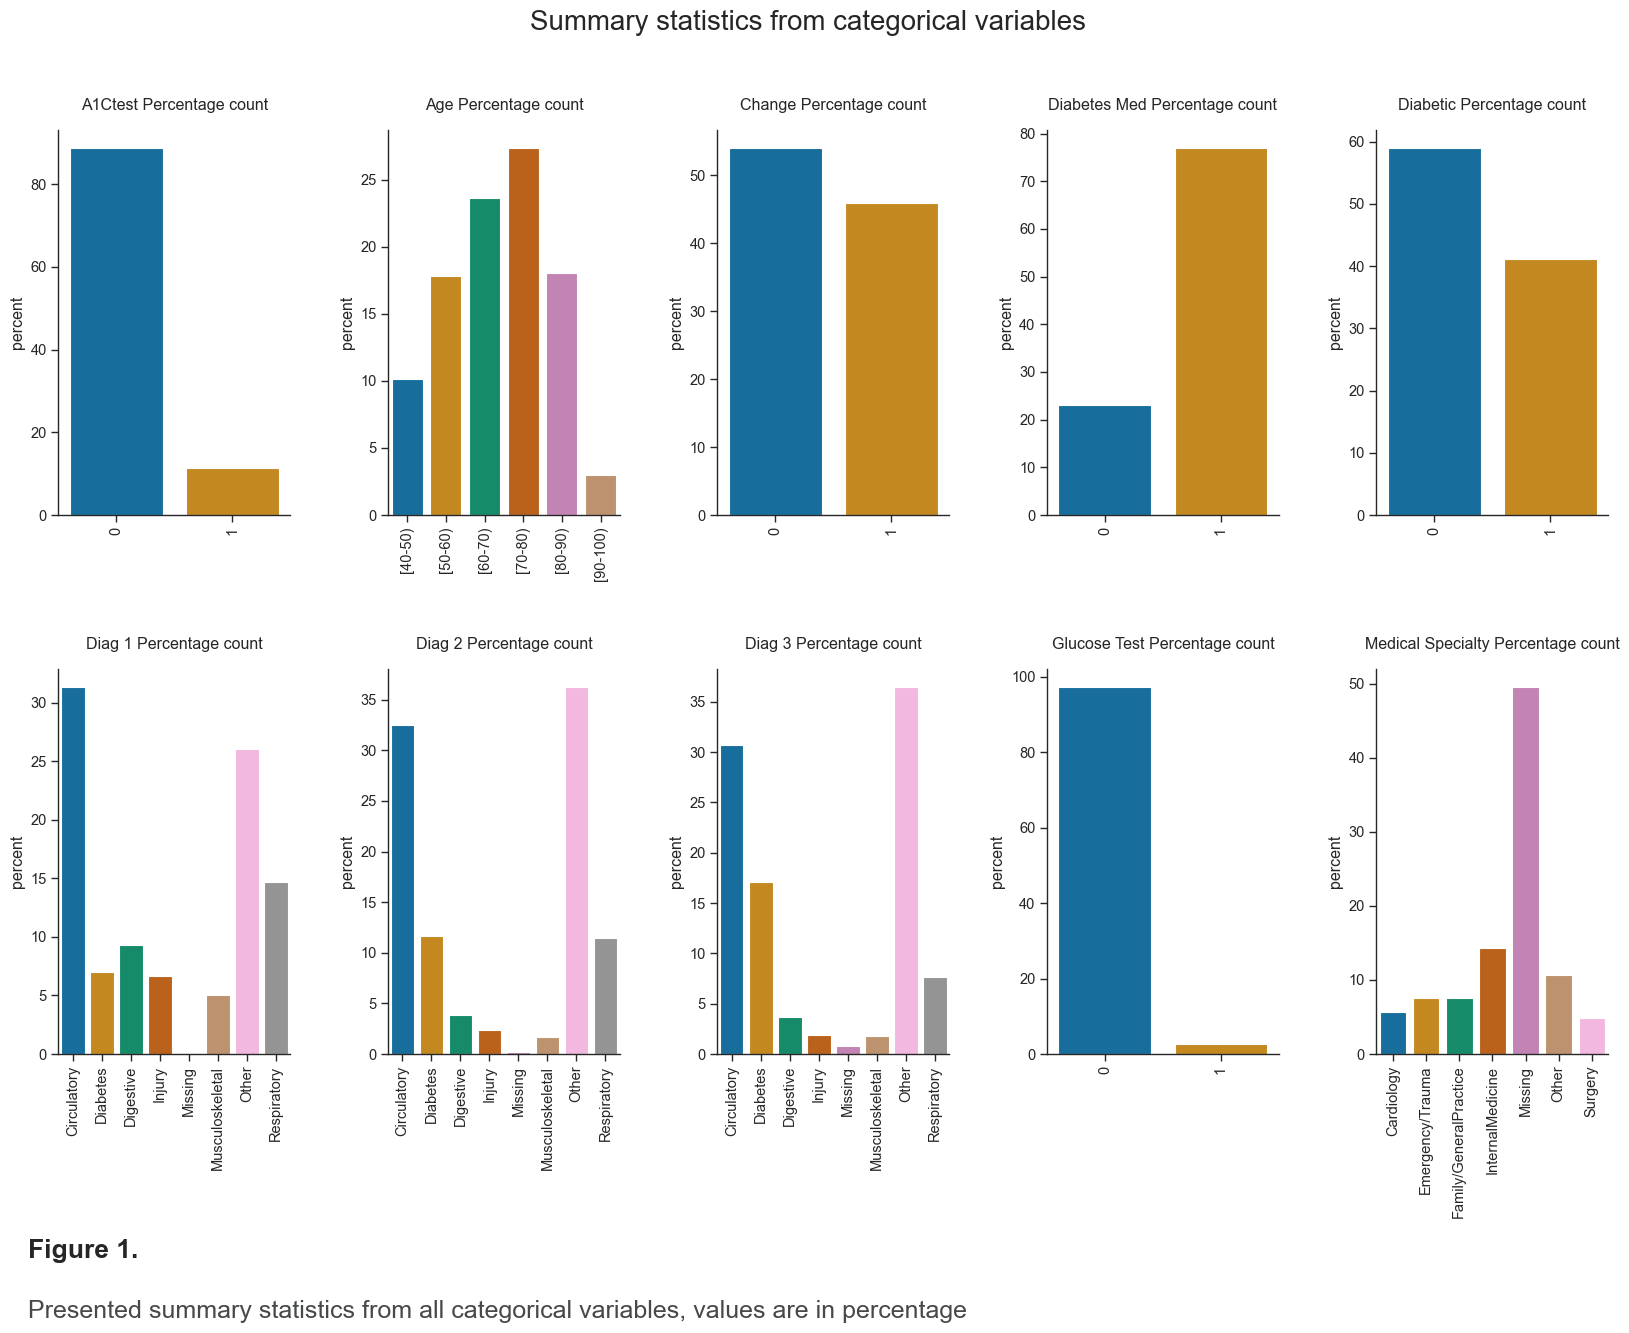

In [11]:
# get summary statistic for categorical variable
grouped_cat = hospital_read[categorical] # subset the data for category clumns
grouped_cat.columns = [col.replace('_', ' ').title() for col in grouped_cat.columns] #replace - with _ and capitalize each word
column_cat = grouped_cat.columns.values.tolist() # convert column names to list

# set figure an subplot
fig, axes = plt.subplots(2, 5, figsize = (20, 12))
list_ax = axes.reshape(-1)

# plot the bar chart displaying the statistics
for col, ax in zip(sorted(column_cat), list_ax):
    (grouped_cat[col].value_counts(normalize = True).mul(100).reset_index(name = 'percent').rename(columns={'index':'values'}).\
    pipe((sns.barplot, 'data'), x = 'values', y = 'percent', ax = ax))
    ax.set_title(f'{col} Percentage count', y = 1.03) # set the title for each subplot
    ax.set_xlabel('') # set the label for the x axis
    ax.tick_params(axis = 'x', rotation = 90)

# set the figure parameters
fig.subplots_adjust(wspace = 0.42, hspace = 0.4) # adjust space between subplots
fig.suptitle('Summary statistics from categorical variables', size = 'xx-large') # set the title of the subplots and size
fig1_summary_stats_cat = set_fig_caption(fig = fig, fig_number = 1,
                                        x = 0.11, y = -0.06,
                                        caption = 'Presented summary statistics from all categorical variables, values are in percentage',
                                        size = 18)
plt.show()


#### 2. Descriptive Statistics and Distribution plot for Numerical Variables

Important findings in Figure 2 and the table below:

+ Most variables showed outliers, with a higher frequency in medical services (inpatient, outpatient, emergency) and number of medications.
+ The average length of hospital stay was 4.45 days.
+ The average number of laboratory procedures was 43.24.
+ The average number of medications used was 16.25.


In [12]:
# explore the descriptive statistics for the numerical columns
table_numeric = hospital_read[non_binary].describe()
columns_numeric = [col.replace('_', ' ').title() for col in table_numeric.columns]
table_numeric.columns = columns_numeric
table_numeric = table_numeric.transpose().round(2)
print('descriptive statistics for the numerical columns')
table_numeric

descriptive statistics for the numerical columns


,count,mean,std,min,25%,50%,75%,max
Time In Hospital,25000.0,4.45,3.00,1.0,2.0,4.0,6.0,14.0
N Lab Procedures,25000.0,43.24,19.82,1.0,31.0,44.0,57.0,113.0
N Procedures,25000.0,1.35,1.72,0.0,0.0,1.0,2.0,6.0
N Medications,25000.0,16.25,8.06,1.0,11.0,15.0,20.0,79.0
N Outpatient,25000.0,0.37,1.20,0.0,0.0,0.0,0.0,33.0
N Inpatient,25000.0,0.62,1.18,0.0,0.0,0.0,1.0,15.0
N Emergency,25000.0,0.19,0.89,0.0,0.0,0.0,0.0,64.0


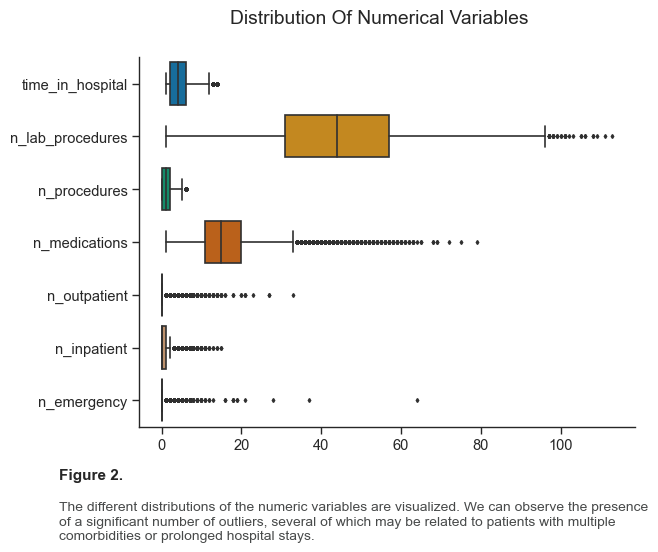

In [13]:
# Plot a box plot to show the distribution of the numerical columns
df_num = hospital_read[non_binary].copy() # make a copy of the dataset
ax_box = sns.boxplot(data = df_num, showfliers = True, 
                    orient='h', fliersize = 2)
ax_box.get_figure().suptitle('Distribution of numerical variables'.title())

# set the caption parameters for the figure
fig1_boxplot_numeric = set_fig_caption(fig = ax_box.get_figure(), fig_number = 2,
                                      gap = 0.08, 
                                      caption = 'The different distributions of the numeric variables are visualized. We can observe the presence\nof a significant number of outliers, several of which may be related to patients with multiple\ncomorbidities or prolonged hospital stays.', size = 10)
plt.show()

#### 3. Proportion of Readmission Vs Non-readmission into Hospitals

As seen from the figure below, more than half of the total patients treated gets readmitted after treatment due to one issue or the other. It migbe due to another illness or some other complications not noticed during the first treatment.

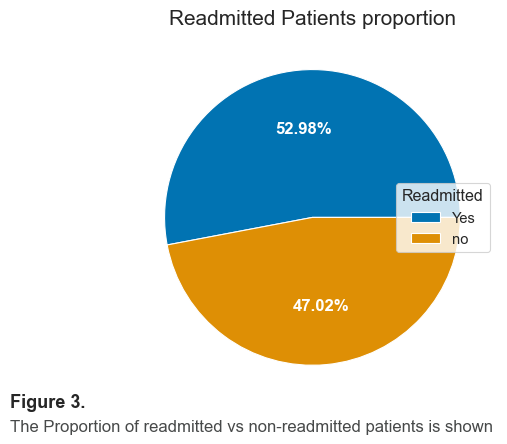

In [16]:
# create a pieplot
ax_readmitted = hospital_read.readmitted.value_counts(normalize=True).plot(kind = 'pie', autopct = lambda x: f'{x:.2f}%',
                                                                          textprops = dict(color = 'w', weight = 'bold',
                                                                                          fontsize = 12))
ax_readmitted.set_ylabel('') # set y label
ax_readmitted.legend(title = 'Readmitted', labels = ['Yes', 'no'],
                   loc = 'right')
ax_readmitted.set_title('Readmitted Patients proportion', size = 15)
fig3_readmitted = ax_readmitted.get_figure()
fig3_readmitted = set_fig_caption(fig= fig3_readmitted, fig_number=3,
                                 x = 0.04, y= 0.1,
                                 size = 12, caption = 'The Proportion of readmitted vs non-readmitted patients is shown')
plt.show()
